In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pingouin as pg

matplotlib.rcParams['svg.fonttype'] = 'none'

In [2]:
tumors = pd.read_csv('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/data/tumor_measures/tumorsize.csv')
wheels = pd.read_csv('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/data/wheels/wheel_summary_data.csv')
fitness = pd.read_csv('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/data/exercise_testing/exercise_testing_summary.csv')
ratios = pd.read_csv('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/data/metabolomics/tissue_ratios.csv')
turnovers = pd.read_csv('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/data/metabolomics/turnover.csv')
fluxes = pd.read_csv('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/data/metabolomics/FractionalContributions.csv')
metabolites = pd.read_csv('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/data/metabolomics/select_tissue_metabolites.csv')

In [3]:
tumors['TumorVolume_Day0'] = 0
tumors_long = tumors.melt(id_vars=['Mouse', 'Condition', 'MaxSpeed'], value_name='TumorSize')

[None]

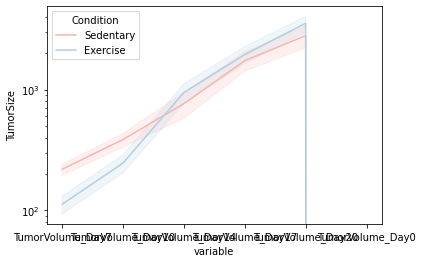

In [4]:
g = sns.lineplot(data=tumors_long, x='variable', y='TumorSize', hue='Condition', ci=68, palette='Pastel1', hue_order=['Sedentary', 'Exercise'])
g.set(yscale="log")
#plt.savefig('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/figures/tumor_curve.svg', dpi=300, bbox_inches='tight')

<Figure size 720x432 with 0 Axes>

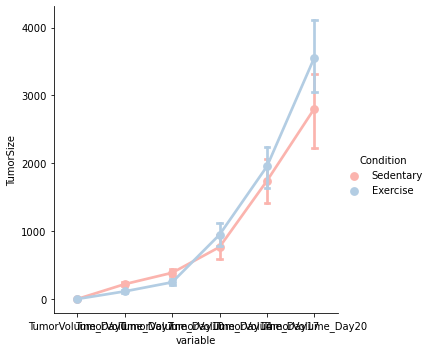

In [5]:
from matplotlib.pyplot import figure

figure(figsize=(10, 6))

g = sns.catplot(data=tumors_long, x='variable', y='TumorSize', hue='Condition', ci=68, palette='Pastel1', order=['TumorVolume_Day0', 'TumorVolume_Day7',
       'TumorVolume_Day10', 'TumorVolume_Day14', 'TumorVolume_Day17',
       'TumorVolume_Day20'], hue_order=['Sedentary', 'Exercise'], kind="point", capsize=0.1)
#plt.savefig('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/figures/tumor_curve_line.svg', dpi=300, bbox_inches='tight')

<Figure size 720x432 with 0 Axes>

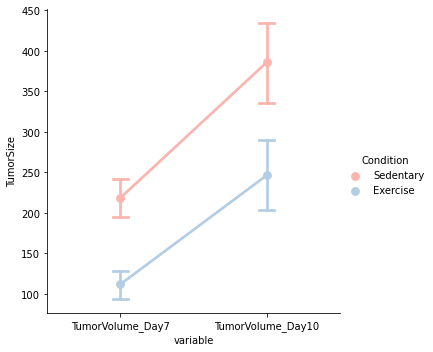

In [6]:
from matplotlib.pyplot import figure

figure(figsize=(10, 6))

g = sns.catplot(data=tumors_long, x='variable', y='TumorSize', hue='Condition', ci=68, palette='Pastel1', order=['TumorVolume_Day7', 'TumorVolume_Day10'], hue_order=['Sedentary', 'Exercise'], kind="point", capsize=0.1)
#plt.savefig('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/figures/tumor_curve_line_Day7_10.svg', dpi=300, bbox_inches='tight')

In [4]:
master_x = pd.merge(tumors, fitness, how="left", on='Mouse')
master_x = pd.merge(master_x, turnovers, how="left", on='Mouse')

In [5]:
#filter out NA values, such as mouse #4
master = master_x.dropna()

In [6]:
tumorsize = master['TumorVolume_Day20'].tolist()

In [7]:
stats.linregress(master['MaxSpeed_y'], master['Peak_VO2'])

LinregressResult(slope=0.5478803997421026, intercept=78.09586825703846, rvalue=0.7402167779855529, pvalue=0.0016018701943540728, stderr=0.13802647227748138, intercept_stderr=4.421445601488625)

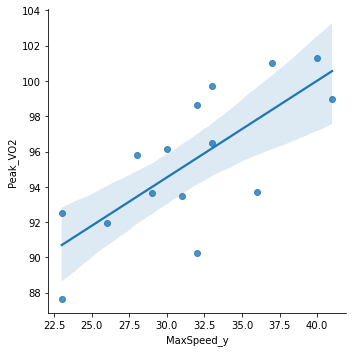

In [11]:
sns.lmplot(data=master, x='MaxSpeed_y', y='Peak_VO2')
plt.savefig('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/figures/VO2peak_vs_maxSpeed.svg', dpi=300, bbox_inches='tight')

In [8]:
vo2 = master['Peak_VO2'].tolist()
mets = master['Peak_METs'].tolist()
speed = master['MaxSpeed_x'].tolist()
gln_turnover = turnovers['Glutamine Turnover'].tolist()

In [9]:
tumor_fluxes = fluxes[fluxes['Tissue'] == 'tumor'].iloc[:, 1:]
quad_fluxes = fluxes[fluxes['Tissue'] == 'quad'].iloc[:, 1:]

In [10]:
stats.linregress(master['TumorVolume_Day20'], master['Peak_VO2'])

LinregressResult(slope=-0.0007582721213848861, intercept=97.83949882650303, rvalue=-0.30136694957764454, pvalue=0.27502606923749107, stderr=0.0006653991482753205, intercept_stderr=2.367646864847389)

In [11]:
proline_tumor = tumor_fluxes[tumor_fluxes['Compound'] == 'proline']
akg_tumor = tumor_fluxes[tumor_fluxes['Compound'] == 'a-ketoglutarate']
succinate_tumor = tumor_fluxes[tumor_fluxes['Compound'] == 'succinate']
malate_tumor = tumor_fluxes[tumor_fluxes['Compound'] == 'malate']

proline_quad = quad_fluxes[quad_fluxes['Compound'] == 'proline']
akg_quad = quad_fluxes[quad_fluxes['Compound'] == 'a-ketoglutarate']
succinate_quad = quad_fluxes[quad_fluxes['Compound'] == 'succinate']
malate_quad = quad_fluxes[quad_fluxes['Compound'] == 'malate']

In [12]:
data = pd.merge(metabolites.iloc[:,1:], fitness.iloc[:,1:], on='Mouse', how='inner')

/Users/brooksleitner/opt/anaconda3/envs/sepsismetabolism/lib/python3.9/site-packages/seaborn/regression.py:592: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


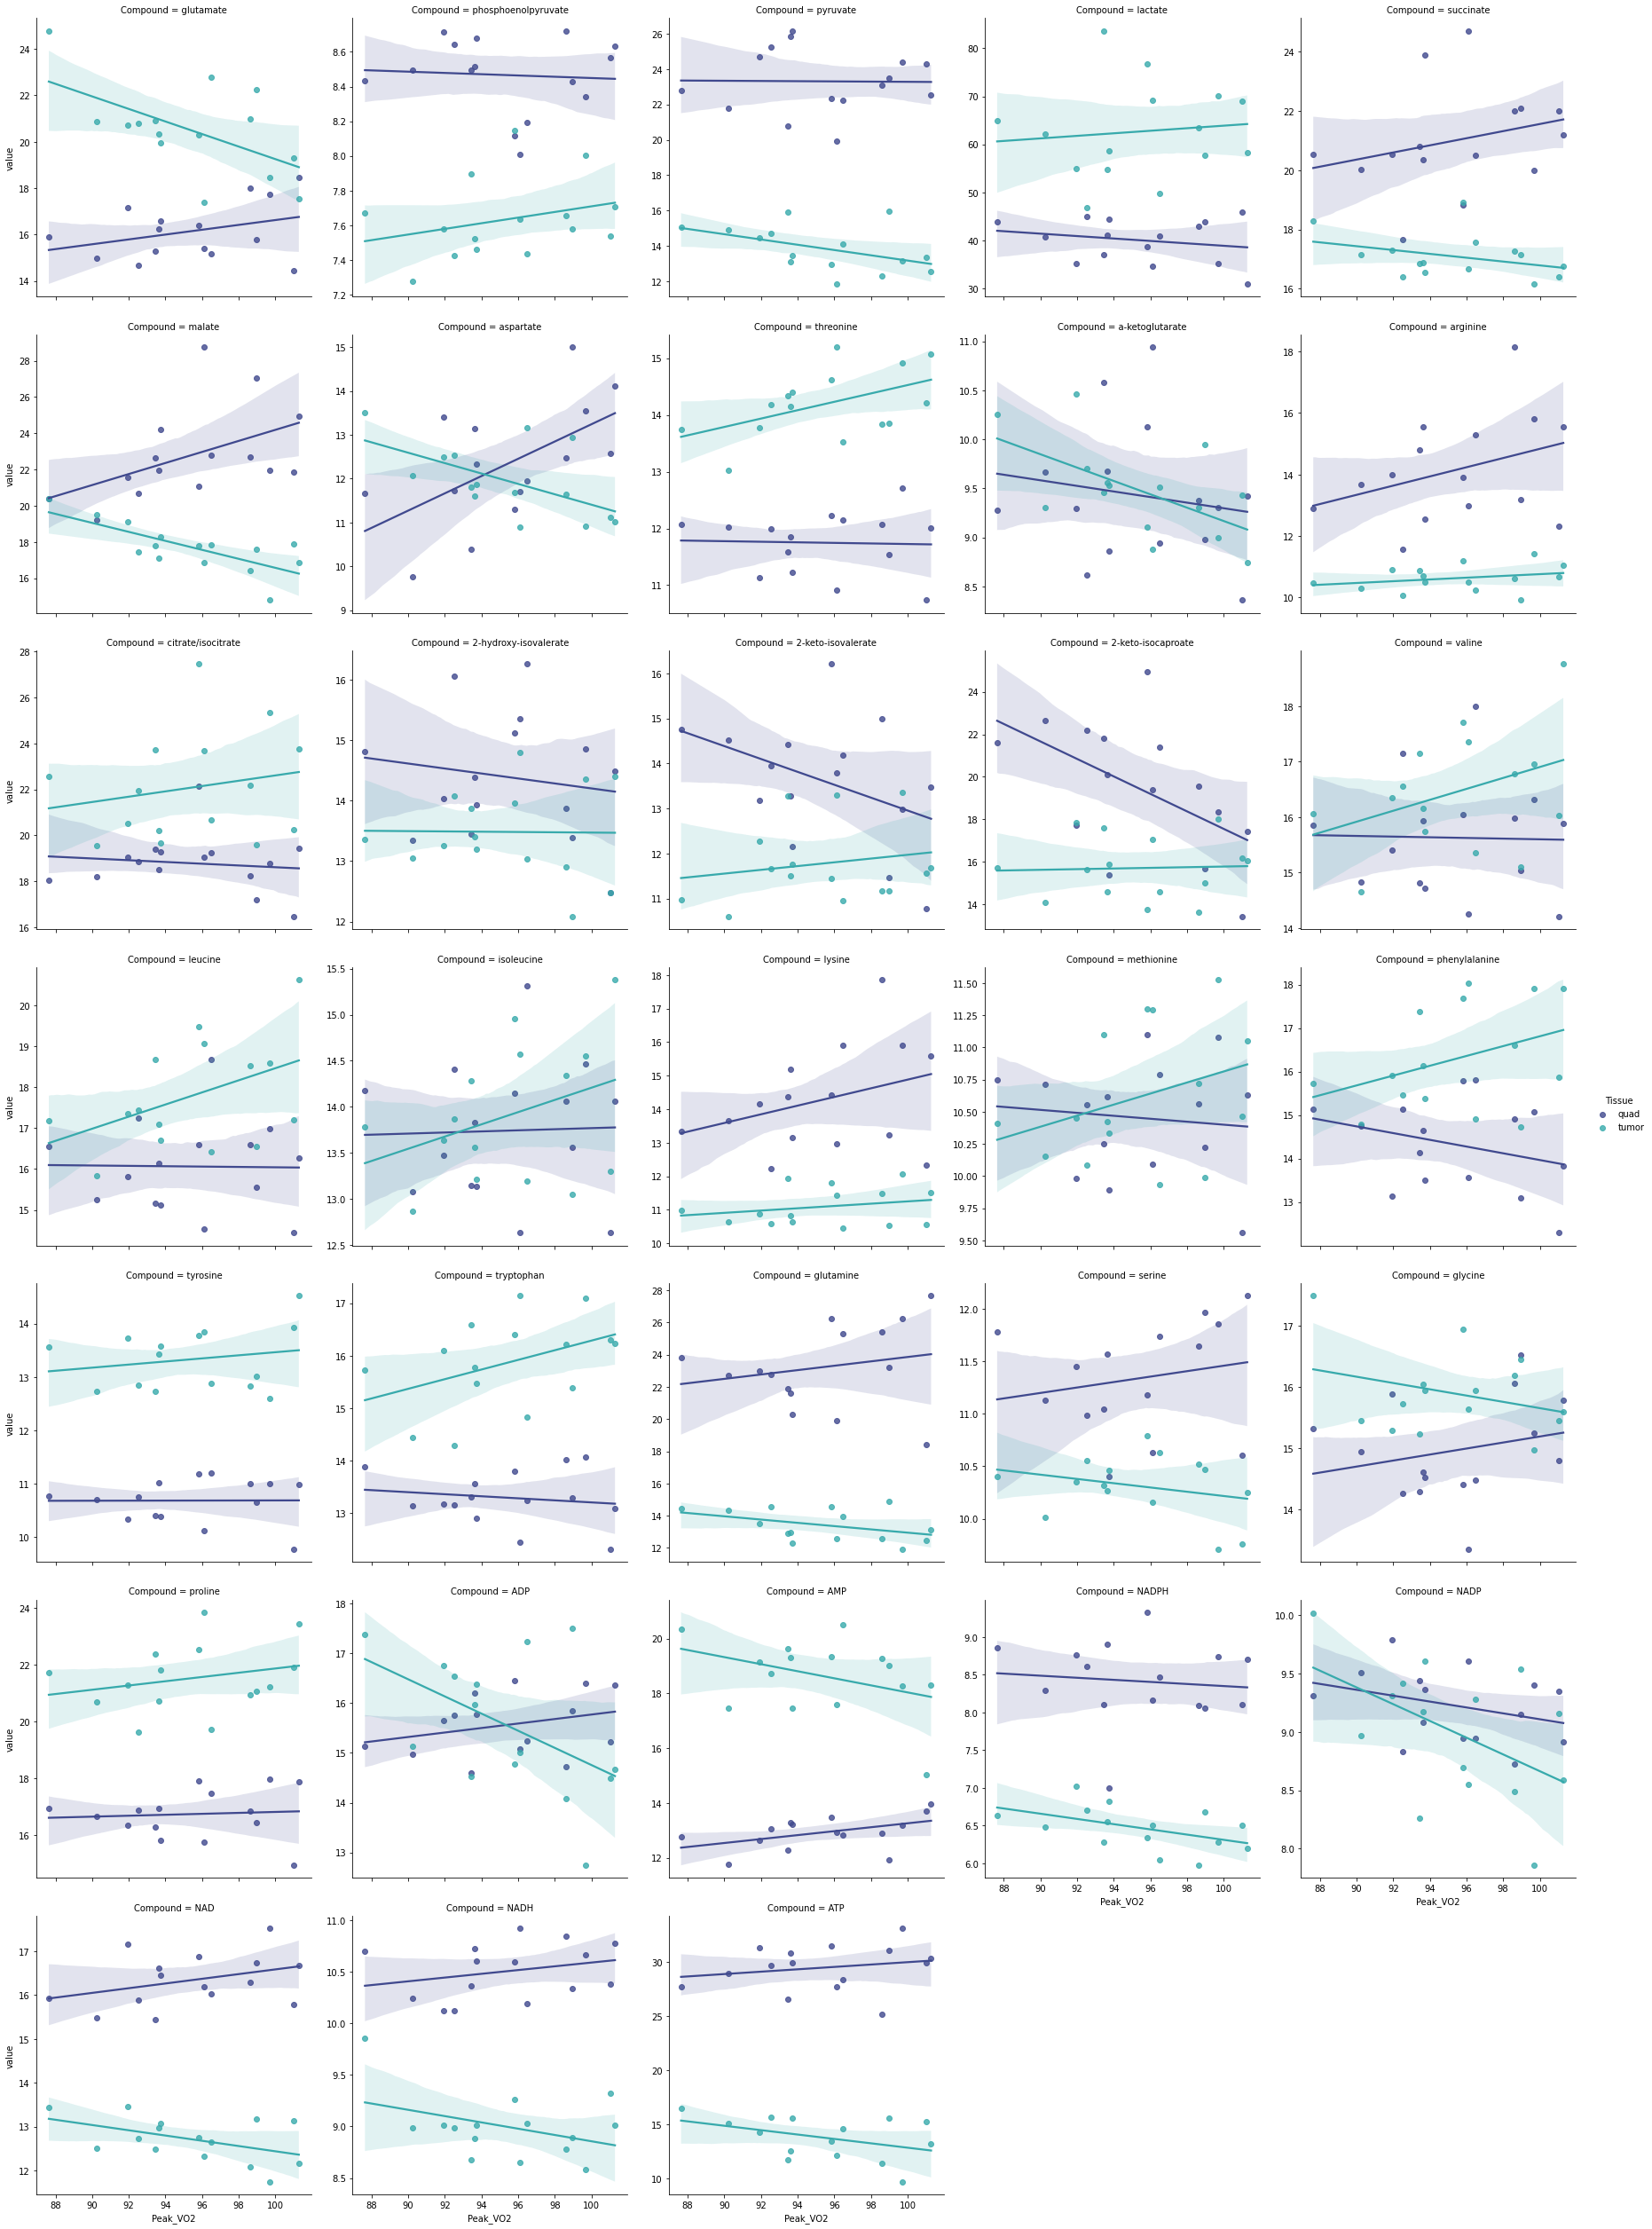

In [53]:
sns.lmplot(data=data, x='Peak_VO2', y='value', col='Compound', hue='Tissue', hue_order=['quad', 'tumor'], col_wrap=5, sharey=False, palette='mako')
#plt.savefig('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/figures/quad_tumor_correlations.svg', dpi=300, bbox_inches='tight')

/Users/brooksleitner/opt/anaconda3/envs/sepsismetabolism/lib/python3.9/site-packages/seaborn/regression.py:592: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


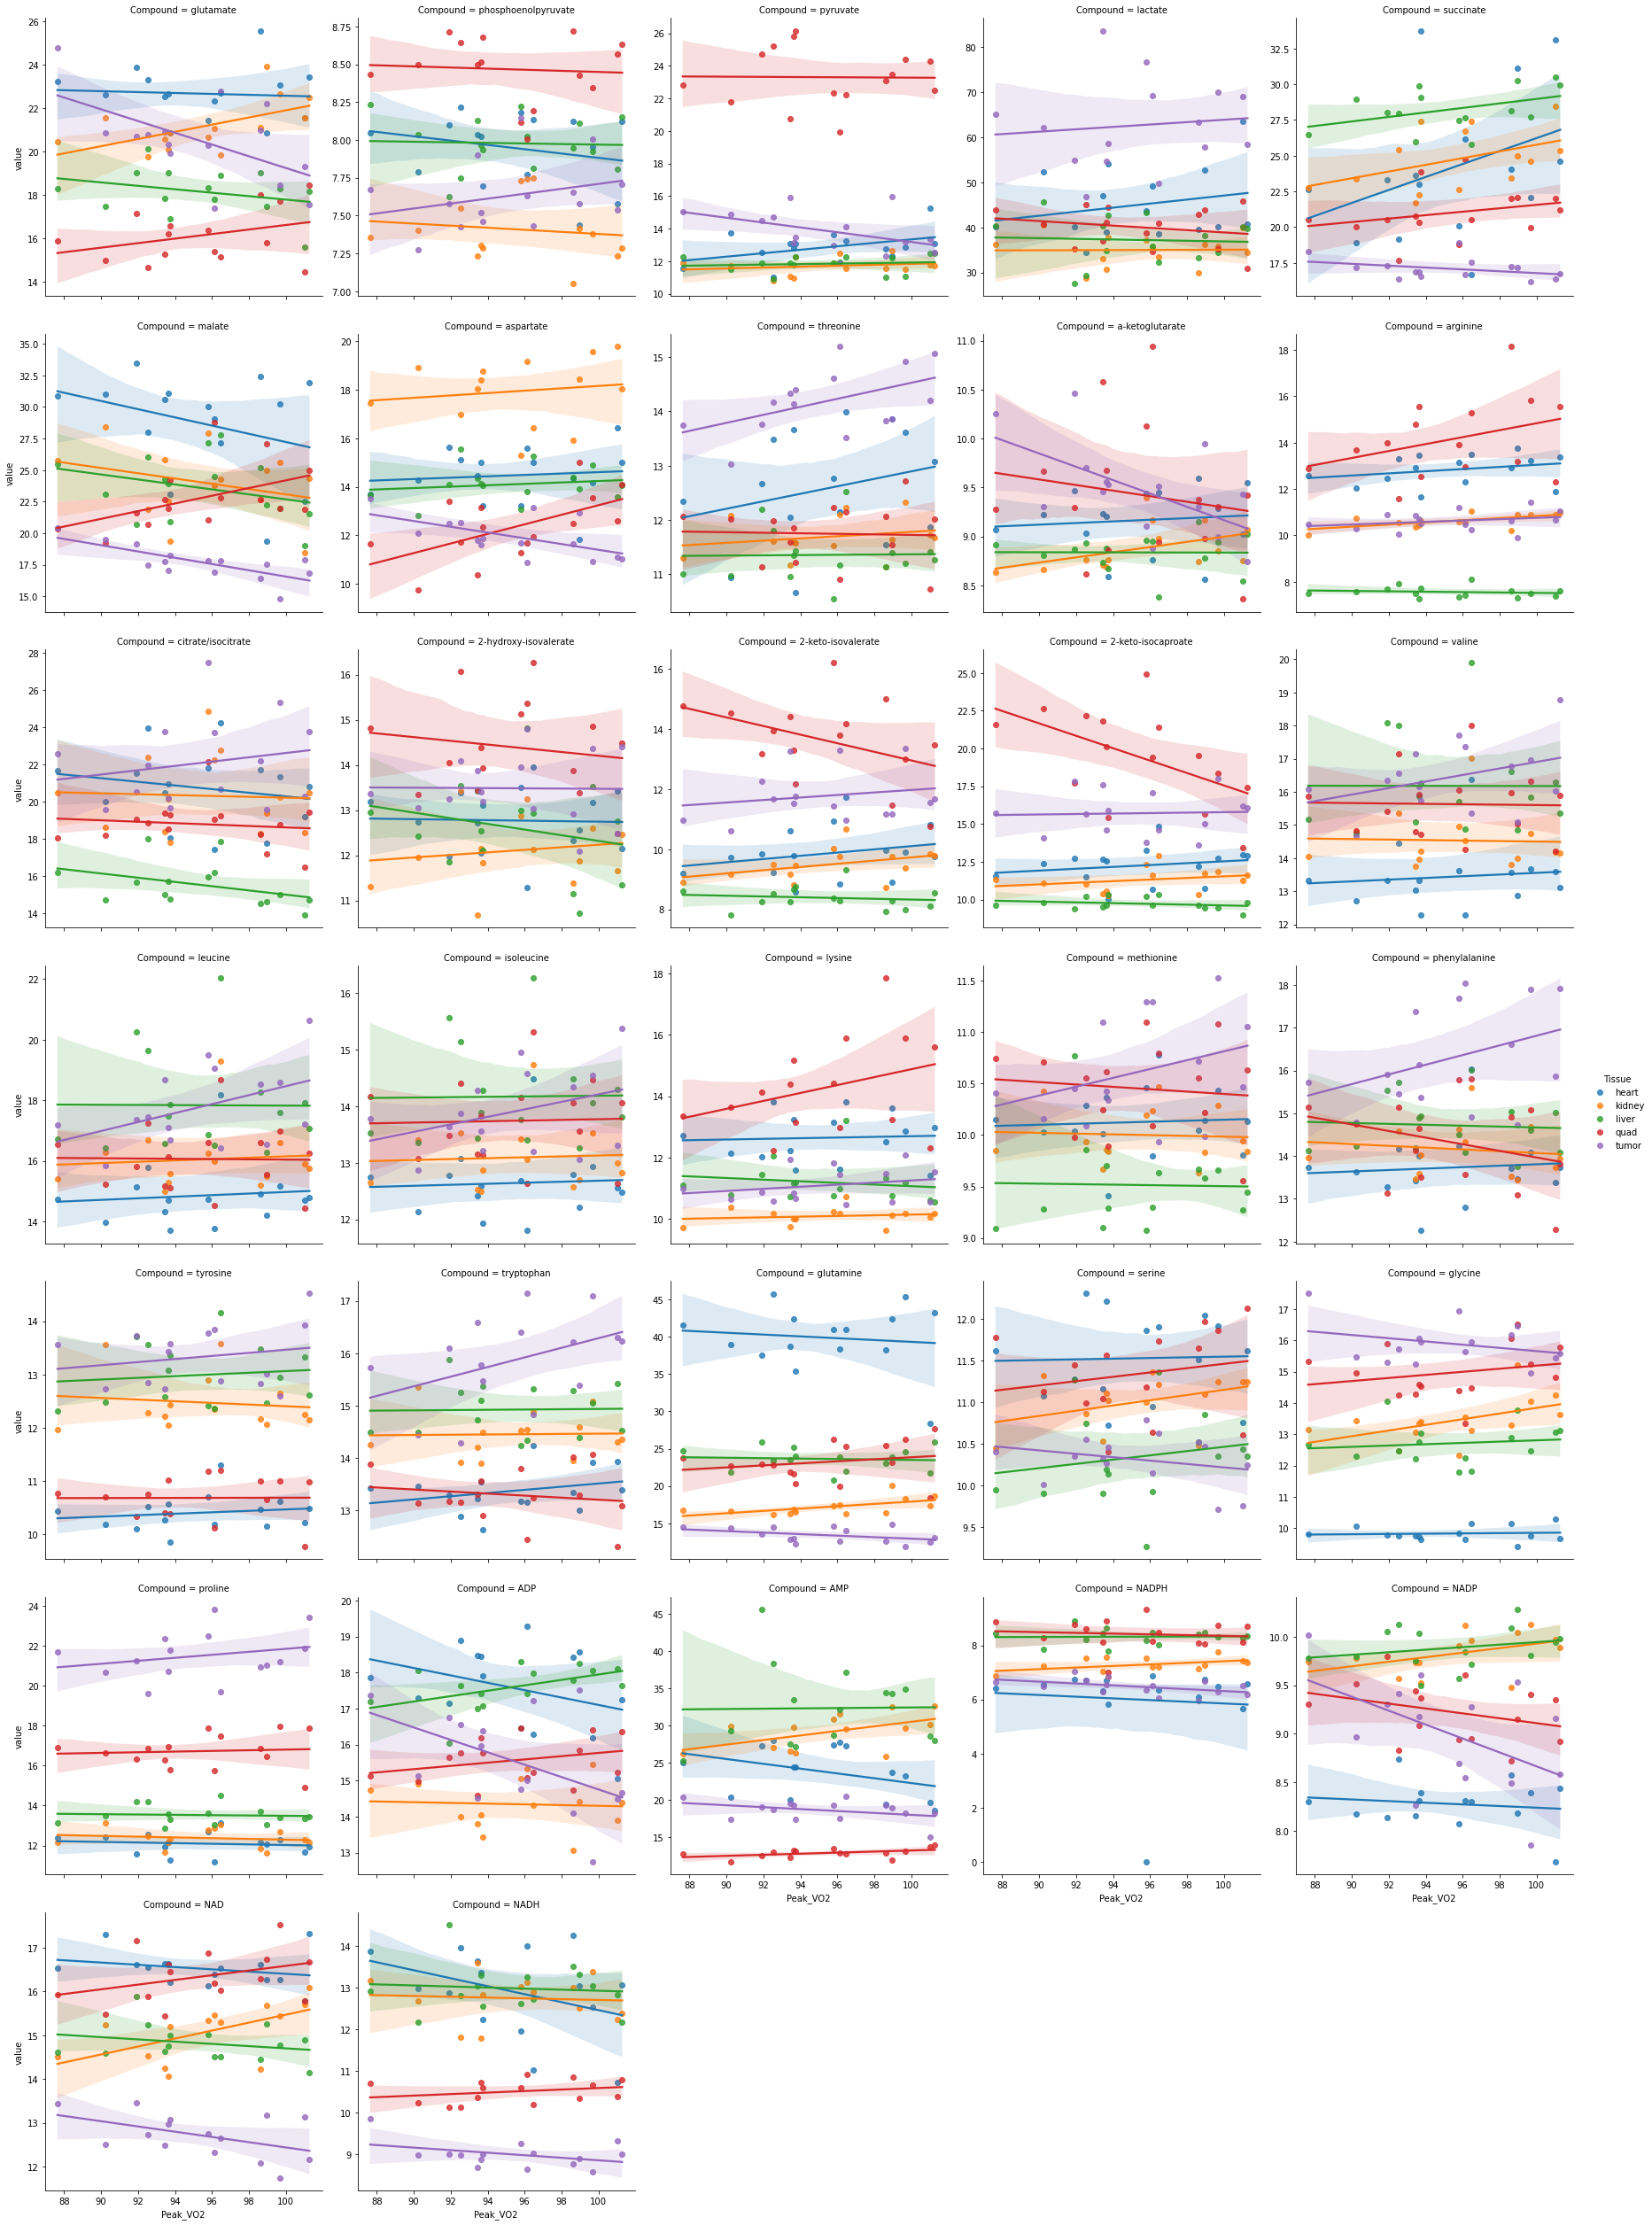

In [31]:
sns.lmplot(data=data, x='Peak_VO2', y='value', col='Compound', hue='Tissue', col_wrap=5, sharey=False)

In [13]:
#muscle malate

malate = data[data['Compound'] == 'malate']
quad_malate = malate[malate['Tissue'] == 'quad']
stats.linregress(quad_malate['Peak_VO2'], quad_malate['value'])

LinregressResult(slope=0.3047106691031098, intercept=-6.284349442994529, rvalue=0.4830080605114681, pvalue=0.06818142082698195, stderr=0.15320581449951734, intercept_stderr=14.629319789462865)

In [14]:
#tumor malate

malate = data[data['Compound'] == 'malate']
tumor_malate = malate[malate['Tissue'] == 'tumor']
stats.linregress(tumor_malate['Peak_VO2'], tumor_malate['value'])

LinregressResult(slope=-0.24801312304642162, intercept=41.37282308561025, rvalue=-0.7472372365322957, pvalue=0.0013657389367917761, stderr=0.0611754207637439, intercept_stderr=5.841519765625969)

In [15]:
#tumor pyruvate

pyruvate = data[data['Compound'] == 'pyruvate']
tumor_pyruvate = pyruvate[pyruvate['Tissue'] == 'tumor']
stats.linregress(tumor_pyruvate['Peak_VO2'], tumor_pyruvate['value'])

LinregressResult(slope=-0.1488439159590466, intercept=28.061861910585954, rvalue=-0.4711465226367945, pvalue=0.07627038606108243, stderr=0.07728568635008072, intercept_stderr=7.379857118719328)

In [46]:
#muscle succinate

succinate = data[data['Compound'] == 'succinate']
quad_succinate = succinate[succinate['Tissue'] == 'quad']
stats.linregress(quad_succinate['Peak_VO2'], quad_succinate['value'])

LinregressResult(slope=0.12006246956826583, intercept=9.556495855009368, rvalue=0.27164320287268096, pvalue=0.3273918282391677, stderr=0.11797540566280713, intercept_stderr=11.26523782645502)

In [17]:
#tumor ADP

adp = data[data['Compound'] == 'ADP']
tumor_adp = adp[adp['Tissue'] == 'tumor']
stats.linregress(tumor_adp['Peak_VO2'], tumor_adp['value'])

LinregressResult(slope=-0.17200076326621844, intercept=31.95490638644395, rvalue=-0.49570325174938673, pvalue=0.06023030856528656, stderr=0.08358007046637386, intercept_stderr=7.9808953914231235)

In [18]:
#tumor NADPH

NADPH = data[data['Compound'] == 'NADPH']
tumor_NADPH = NADPH[NADPH['Tissue'] == 'tumor']
stats.linregress(tumor_NADPH['Peak_VO2'], tumor_NADPH['value'])

LinregressResult(slope=-0.0345947535684837, intercept=9.771014684771444, rvalue=-0.4860016591223471, pvalue=0.06624187579527624, stderr=0.017254060599060855, intercept_stderr=1.6475560734754469)

In [19]:
#muscle keto-isocaproate

kic = data[data['Compound'] == '2-keto-isocaproate']
quad_kic = kic[kic['Tissue'] == 'quad']
stats.linregress(quad_kic['Peak_VO2'], quad_kic['value'])

LinregressResult(slope=-0.41056388550706535, intercept=58.61349643349886, rvalue=-0.5276507002838039, pvalue=0.043227489994785206, stderr=0.18331846811519015, intercept_stderr=17.504717442561667)

In [20]:
stats.linregress(quad_kic['Peak_VO2'], quad_kic['value'])

LinregressResult(slope=-0.41056388550706535, intercept=58.61349643349886, rvalue=-0.5276507002838039, pvalue=0.043227489994785206, stderr=0.18331846811519015, intercept_stderr=17.504717442561667)

In [21]:
#tumor keto-isocaproate

kic = data[data['Compound'] == '2-keto-isocaproate']
tumor_kic = kic[kic['Tissue'] == 'tumor']
stats.linregress(tumor_kic['Peak_VO2'], tumor_kic['value'])

LinregressResult(slope=0.015274329548599258, intercept=14.25871180599699, rvalue=0.042469164883844536, pvalue=0.8805442987069063, stderr=0.09966088794747419, intercept_stderr=9.516420803271918)

In [22]:
#muscle glutamine

glutamine = data[data['Compound'] == 'glutamine']
quad_glutamine = glutamine[glutamine['Tissue'] == 'quad']
stats.linregress(quad_glutamine['Peak_VO2'], quad_glutamine['value'])

LinregressResult(slope=0.13566913686840573, intercept=10.282762432839874, rvalue=0.21012003063361545, pvalue=0.45226515303624526, stderr=0.1750800675857536, intercept_stderr=16.71804889285602)

In [23]:
#tumor glutamine

glutamine = data[data['Compound'] == 'glutamine']
tumor_glutamine = glutamine[glutamine['Tissue'] == 'tumor']
stats.linregress(tumor_glutamine['Peak_VO2'], tumor_glutamine['value'])

LinregressResult(slope=-0.10144523364922145, intercept=23.094737083716005, rvalue=-0.416397516331531, pvalue=0.12261204514391678, stderr=0.06143317825326974, intercept_stderr=5.866132517790245)

In [24]:
#quad glutamine

glutamine = data[data['Compound'] == 'glutamine']
quad_glutamine = glutamine[glutamine['Tissue'] == 'quad']
stats.linregress(quad_glutamine['Peak_VO2'], quad_glutamine['value'])

LinregressResult(slope=0.13566913686840573, intercept=10.282762432839874, rvalue=0.21012003063361545, pvalue=0.45226515303624526, stderr=0.1750800675857536, intercept_stderr=16.71804889285602)

In [25]:
#tumor glutamate

glutamate = data[data['Compound'] == 'glutamate']
tumor_glutamate = glutamate[glutamate['Tissue'] == 'tumor']
stats.linregress(tumor_glutamate['Peak_VO2'], tumor_glutamate['value'])

LinregressResult(slope=-0.27014399265623434, intercept=46.266204290645135, rvalue=-0.5660072374293746, pvalue=0.027847162665374025, stderr=0.1091289005229878, intercept_stderr=10.420502571906626)

In [26]:
#muscle glutamate

glutamate = data[data['Compound'] == 'glutamate']
quad_glutamate = glutamate[glutamate['Tissue'] == 'quad']
stats.linregress(quad_glutamate['Peak_VO2'], quad_glutamate['value'])

LinregressResult(slope=0.1042699649749934, intercept=6.199408350339391, rvalue=0.33916342708802927, pvalue=0.21620509828581094, stderr=0.08021255715409828, intercept_stderr=7.659338214879357)

In [27]:
#tumor aspartate

aspartate = data[data['Compound'] == 'aspartate']
tumor_aspartate = aspartate[aspartate['Tissue'] == 'tumor']
stats.linregress(tumor_aspartate['Peak_VO2'], tumor_aspartate['value'])

LinregressResult(slope=-0.11852093640249078, intercept=23.257007535158557, rvalue=-0.5770013193539841, pvalue=0.024321111550736785, stderr=0.046529900779373586, intercept_stderr=4.443048069011624)

In [28]:
#quad aspartate

aspartate = data[data['Compound'] == 'aspartate']
quad_aspartate = aspartate[aspartate['Tissue'] == 'quad']
stats.linregress(quad_aspartate['Peak_VO2'], quad_aspartate['value'])

LinregressResult(slope=0.1969551751382059, intercept=-6.454740835866165, rvalue=0.5760068429893814, pvalue=0.02462531028328551, stderr=0.07752228241935498, intercept_stderr=7.402449208775766)

In [40]:
stats.linregress(quad_malate['value'], quad_aspartate['value'])

LinregressResult(slope=0.24764928263642327, intercept=6.693161928695125, rvalue=0.45690993661289997, pvalue=0.08685931471112021, stderr=0.13371713912220168, intercept_stderr=3.06470154184202)

In [41]:
quad_kic_content = quad_kic['value'].tolist()
quad_asp_content = quad_aspartate['value'].tolist()
quad_mal_content = quad_malate['value'].tolist()

tumor_kic_content = tumor_kic['value'].tolist()
tumor_asp_content = tumor_aspartate['value'].tolist()

In [31]:
asp_to_kic_quad = np.array(quad_asp_content) / np.array(quad_kic_content)

In [42]:
asp_to_mal_quad = np.array(quad_asp_content) / np.array(quad_mal_content)

In [32]:
quad_AMP_content = quad_AMP['value'].tolist()
quad_asp_content = quad_aspartate['value'].tolist()
asp_to_AMP_quad = np.array(quad_asp_content) / np.array(quad_AMP_content)

In [75]:
df = pd.DataFrame()
df['vo2'] = vo2
df['asp_to_AMP_quad'] = asp_to_AMP_quad
df['tumorsize'] = tumorsize

In [37]:
stats.linregress(vo2, asp_to_kic_quad)

LinregressResult(slope=0.025630169076518362, intercept=-1.7867489398773184, rvalue=0.6126514142872284, pvalue=0.015177594814146994, stderr=0.00917038550158501, intercept_stderr=0.8756619488209018)

In [77]:
stats.linregress(tumorsize, asp_to_AMP_quad)

LinregressResult(slope=-4.419802229950745e-05, intercept=1.0967065080085852, rvalue=-0.6535682940438017, pvalue=0.00823078446395907, stderr=1.4195806451774675e-05, intercept_stderr=0.05051202233522795)

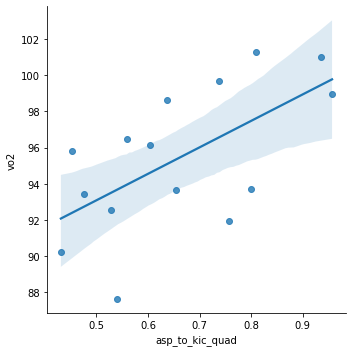

In [39]:
sns.lmplot(data=df, x='asp_to_kic_quad', y='vo2')
plt.savefig('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/figures/kic_to_asp_vs_vo2.svg', dpi=300, bbox_inches='tight')

In [35]:
df = pd.DataFrame()
df['vo2'] = vo2
df['asp_to_kic_quad'] = asp_to_kic_quad
df['tumorsize'] = tumorsize

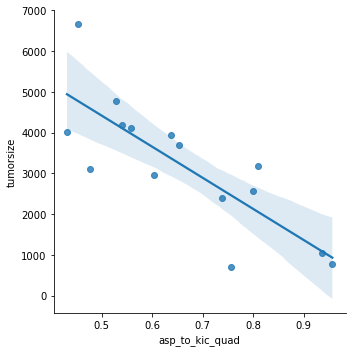

In [28]:
sns.lmplot(data=df, x='asp_to_kic_quad', y='tumorsize')
plt.savefig('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/figures/kic_to_asp_vs_tumorsize.svg', dpi=300, bbox_inches='tight')

In [47]:
pdq = pd.DataFrame()
pdq['kic'] = tumor_kic_content
pdq['aspartate'] = tumor_asp_content

In [51]:
stats.linregress(tumor_kic_content, tumor_asp_content)

LinregressResult(slope=-0.14991432024790952, intercept=14.305112930860046, rvalue=-0.2624903169981185, pvalue=0.34458563895193217, stderr=0.152846693321529, intercept_stderr=2.4116245037654997)

In [39]:
xyz = pd.DataFrame()
xyz['kic'] = quad_kic_content
xyz

,kic
0,22.626820
1,15.402996
2,19.559121
3,21.807610
4,21.586198
5,24.944744
6,22.195206
7,13.442010
8,19.402075
9,18.336107


In [40]:
xyz['aspartate'] = quad_asp_content

In [48]:
pdq

,kic,aspartate
0,14.098338,12.071171
1,15.876969,11.860689
2,13.640775,11.641105
3,17.600350,11.803522
4,15.712582,13.503362
5,13.768307,11.692329
6,15.641349,12.539654
7,16.167214,11.108056
8,17.076779,10.884583
9,18.006239,10.920984


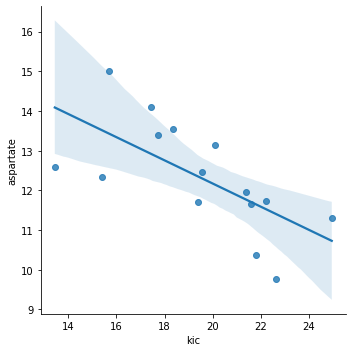

In [43]:
sns.lmplot(data=xyz, x='kic', y='aspartate')
plt.savefig('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/figures/kic_vs_aspartate.svg', dpi=300, bbox_inches='tight')

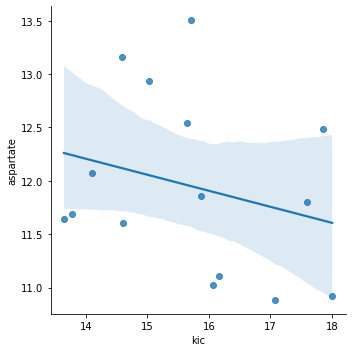

In [50]:
sns.lmplot(data=pdq, x='kic', y='aspartate')
plt.savefig('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/figures/kic_vs_aspartate_tumor.svg', dpi=300, bbox_inches='tight')

In [48]:
tumor_ratios = ratios.iloc[:,1:][ratios['Tissue'] == 'tumor']

In [49]:
Mouse = np.concatenate([([i]*6) for i in [1,2,3,5,6,7,8,9,10,11,12,13,14,15,16]], axis=0)

In [50]:
vo2_ratios = np.concatenate([([i]*6) for i in vo2], axis=0)

In [51]:
tumor_ratios['Mouse'] = Mouse

In [52]:
tumor_ratios['VO2_Peak'] = vo2_ratios

In [53]:
tumor_ratios

,Compound,variable,Abundance,Tissue,Condition,Mouse,VO2_Peak
24,Glu_Akg,1_tumor,62.141931,tumor,Exercise,1,90.233333
25,ADP_ATP,1_tumor,1.023774,tumor,Exercise,1,90.233333
26,NAD_NADH,1_tumor,8.729087,tumor,Exercise,1,90.233333
27,NADP_NADPH,1_tumor,19.301400,tumor,Exercise,1,90.233333
28,AMP_ATP,1_tumor,1.880956,tumor,Exercise,1,90.233333
...,...,...,...,...,...,...,...
439,ADP_ATP,16_tumor,1.625837,tumor,Sedentary,16,98.966667
440,NAD_NADH,16_tumor,12.631461,tumor,Sedentary,16,98.966667
441,NADP_NADPH,16_tumor,22.326861,tumor,Sedentary,16,98.966667
442,AMP_ATP,16_tumor,2.222358,tumor,Sedentary,16,98.966667


/Users/brooksleitner/opt/anaconda3/envs/sepsismetabolism/lib/python3.9/site-packages/seaborn/regression.py:592: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


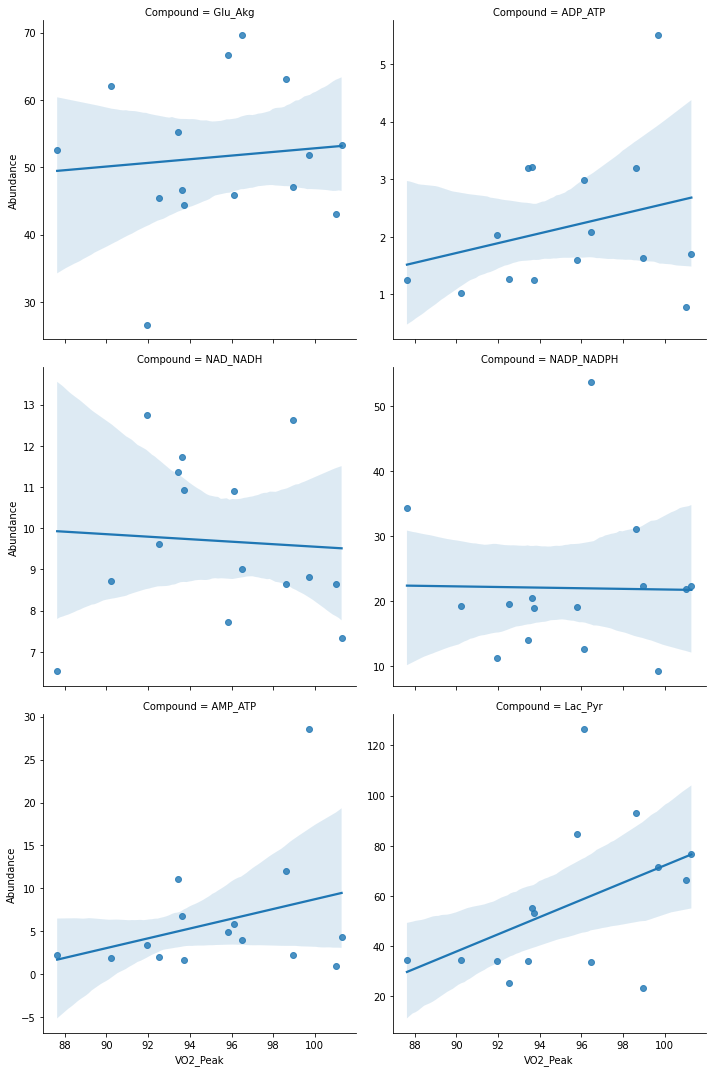

In [54]:
sns.lmplot(data=tumor_ratios, x='VO2_Peak', y='Abundance', col='Compound', col_wrap=2, sharey=False)

# ANCOVAs (with PeakVO2 as a covariate) & TTests

Pingouin ANCOVA: https://pingouin-stats.org/generated/pingouin.ancova.html#pingouin.ancova

Pingouin t-test: https://pingouin-stats.org/generated/pingouin.ttest.html#pingouin.ttest

In [55]:
from pingouin import ancova, ttest

# Tumor Ratios

In [56]:
tumor_ratios.head(6)

,Compound,variable,Abundance,Tissue,Condition,Mouse,VO2_Peak
24,Glu_Akg,1_tumor,62.141931,tumor,Exercise,1,90.233333
25,ADP_ATP,1_tumor,1.023774,tumor,Exercise,1,90.233333
26,NAD_NADH,1_tumor,8.729087,tumor,Exercise,1,90.233333
27,NADP_NADPH,1_tumor,19.301400,tumor,Exercise,1,90.233333
28,AMP_ATP,1_tumor,1.880956,tumor,Exercise,1,90.233333
29,Lac_Pyr,1_tumor,34.494842,tumor,Exercise,1,90.233333


In [57]:
ancova(data=tumor_ratios[tumor_ratios['Compound'] == 'AMP_ATP'], dv='Abundance', covar='VO2_Peak', between='Condition')

,Source,SS,DF,F,p-unc,np2
0,Condition,41.403560,1,0.859014,0.372280,0.066803
1,VO2_Peak,21.777705,1,0.451830,0.514202,0.036286
2,Residual,578.386956,12,NaN,NaN,NaN


In [58]:
x = tumor_ratios[tumor_ratios['Compound'] == 'AMP_ATP']
a = x[x['Condition'] == 'Exercise']['Abundance'].tolist()
b = x[x['Condition'] == 'Sedentary']['Abundance'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.514228,7.820568,two-sided,0.169285,"[-2.64, 12.63]",0.73472,0.905,0.260293


In [59]:
ancova(data=tumor_ratios[tumor_ratios['Compound'] == 'ADP_ATP'], dv='Abundance', covar='VO2_Peak', between='Condition')

,Source,SS,DF,F,p-unc,np2
0,Condition,0.088524,1,0.053501,0.820977,0.004439
1,VO2_Peak,1.009272,1,0.609966,0.449934,0.048372
2,Residual,19.855641,12,NaN,NaN,NaN


In [60]:
x = tumor_ratios[tumor_ratios['Compound'] == 'ADP_ATP']
a = x[x['Condition'] == 'Exercise']['Abundance'].tolist()
b = x[x['Condition'] == 'Sedentary']['Abundance'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.699618,11.09306,two-sided,0.498574,"[-0.95, 1.83]",0.348364,0.514,0.095763


In [61]:
ancova(data=tumor_ratios[tumor_ratios['Compound'] == 'Glu_Akg'], dv='Abundance', covar='VO2_Peak', between='Condition')

,Source,SS,DF,F,p-unc,np2
0,Condition,810.629731,1,11.374993,0.005543,0.486631
1,VO2_Peak,88.691340,1,1.244543,0.286440,0.093966
2,Residual,855.170360,12,NaN,NaN,NaN


In [62]:
x = tumor_ratios[tumor_ratios['Compound'] == 'Glu_Akg']
a = x[x['Condition'] == 'Exercise']['Abundance'].tolist()
b = x[x['Condition'] == 'Sedentary']['Abundance'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.20862,12.952469,two-sided,0.006881,"[4.59, 23.54]",1.650745,6.827,0.838185


In [63]:
ancova(data=tumor_ratios[tumor_ratios['Compound'] == 'Lac_Pyr'], dv='Abundance', covar='VO2_Peak', between='Condition')

,Source,SS,DF,F,p-unc,np2
0,Condition,2.983798,1,0.003694,0.952536,0.000308
1,VO2_Peak,2177.316375,1,2.695575,0.126556,0.183428
2,Residual,9692.846846,12,NaN,NaN,NaN


In [64]:
x = tumor_ratios[tumor_ratios['Compound'] == 'Lac_Pyr']
a = x[x['Condition'] == 'Exercise']['Abundance'].tolist()
b = x[x['Condition'] == 'Sedentary']['Abundance'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.712657,10.361343,two-sided,0.491795,"[-24.17, 47.06]",0.378788,0.518,0.104288


In [65]:
ancova(data=tumor_ratios[tumor_ratios['Compound'] == 'NAD_NADH'], dv='Abundance', covar='VO2_Peak', between='Condition')

,Source,SS,DF,F,p-unc,np2
0,Condition,15.864538,1,5.336648,0.039468,0.307825
1,VO2_Peak,2.014021,1,0.677494,0.426506,0.053441
2,Residual,35.673036,12,NaN,NaN,NaN


In [66]:
x = tumor_ratios[tumor_ratios['Compound'] == 'NAD_NADH']
a = x[x['Condition'] == 'Exercise']['Abundance'].tolist()
b = x[x['Condition'] == 'Sedentary']['Abundance'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.119899,9.104479,two-sided,0.062701,"[-4.01, 0.13]",1.139751,1.688,0.531301


In [67]:
ancova(data=tumor_ratios[tumor_ratios['Compound'] == 'NADP_NADPH'], dv='Abundance', covar='VO2_Peak', between='Condition')

,Source,SS,DF,F,p-unc,np2
0,Condition,77.858857,1,0.575899,0.462570,0.045794
1,VO2_Peak,21.940895,1,0.162290,0.694141,0.013344
2,Residual,1622.343363,12,NaN,NaN,NaN


In [68]:
x = tumor_ratios[tumor_ratios['Compound'] == 'NADP_NADPH']
a = x[x['Condition'] == 'Exercise']['Abundance'].tolist()
b = x[x['Condition'] == 'Sedentary']['Abundance'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.69406,11.132846,two-sided,0.50187,"[-8.42, 16.2]",0.345714,0.513,0.095056


# Tumor Size

In [69]:
master

,Mouse,Condition_x,MaxSpeed_x,TumorVolume_Day7,TumorVolume_Day10,TumorVolume_Day14,TumorVolume_Day17,TumorVolume_Day20,TumorVolume_Day0,Unnamed: 0,...,Baseline_RER,Peak_VO2,Peak_RER,Peak_METs,Recovery_VO2,Recovery_RER,MaxSpeed_y,Glucose Turnover,Condition,Glutamine Turnover
0,1,Exercise,32,38.318400,103.476710,1228.446925,1597.734650,4018.263806,0,0,...,0.800364,90.233333,0.952,1.293303,59.985000,0.7590,32,230.413282,Exercise,81.362291
1,2,Sedentary,36,136.030320,300.595075,836.061719,1102.861562,2560.420054,0,0,...,0.768636,93.716667,0.949,1.217411,69.640000,0.7352,36,225.176808,Sedentary,102.983304
2,3,Exercise,32,85.212139,449.881965,1207.887506,2081.868475,3931.467840,0,0,...,0.780000,98.616667,0.914,1.390243,64.755000,0.7302,32,155.568361,Exercise,60.163648
4,5,Exercise,31,152.901060,162.647239,635.189747,2416.016632,3104.927179,0,0,...,0.788455,93.450000,0.949,1.395313,77.090000,0.7333,31,224.079383,Exercise,98.731536
5,6,Sedentary,23,297.016562,694.619989,1415.377385,2875.077450,4188.064877,0,0,...,0.735727,87.633333,0.917,1.210887,68.256667,0.7246,23,215.059224,Sedentary,90.381417
6,7,Exercise,28,85.152000,108.934421,1639.309050,3547.073085,6666.523470,0,0,...,0.719091,95.816667,0.907,1.237820,74.606667,0.7098,28,237.449150,Exercise,119.955882
7,8,Sedentary,23,309.230552,315.304019,1446.596237,2220.764160,4786.260870,0,0,...,0.799364,92.533333,0.924,1.213528,84.730000,0.7577,23,148.616205,Sedentary,68.450467
8,9,Exercise,37,227.317522,212.839553,282.832900,732.494534,1049.157792,0,0,...,0.803091,101.016667,0.932,1.221774,68.055000,0.7167,37,294.330449,Exercise,107.387085
9,10,Sedentary,30,230.576182,474.108773,620.144986,2305.388218,2951.594505,0,0,...,0.742455,96.116667,0.920,1.331731,74.870000,0.7275,30,256.198812,Sedentary,114.702771
10,11,Exercise,33,96.800794,212.437210,436.307672,1310.738350,2385.492833,0,0,...,0.775455,99.700000,0.961,1.540814,69.023333,0.7254,33,201.762298,Exercise,101.874767


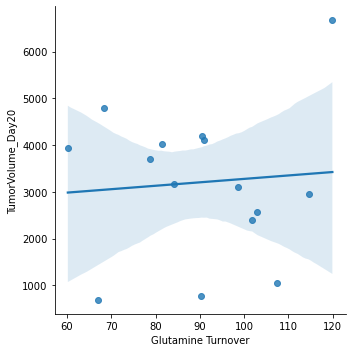

In [92]:
sns.lmplot(data=master, x='Glutamine Turnover', y='TumorVolume_Day20')

In [70]:
#Max Speed as a Covariate
ancova(data=master, dv='TumorVolume_Day7', covar='MaxSpeed_x', between='Condition_x')

,Source,SS,DF,F,p-unc,np2
0,Condition_x,32292.603112,1,7.08985,0.020689,0.371394
1,MaxSpeed_x,683.898164,1,0.15015,0.705177,0.012358
2,Residual,54657.184808,12,NaN,NaN,NaN


In [71]:
ancova(data=master, dv='TumorVolume_Day7', covar='Peak_VO2', between='Condition_x')

,Source,SS,DF,F,p-unc,np2
0,Condition_x,37220.522878,1,8.231470,0.014115,0.406865
1,Peak_VO2,1080.265865,1,0.238905,0.633809,0.019520
2,Residual,54260.817106,12,NaN,NaN,NaN


In [72]:
q = 'TumorVolume_Day7'
a = master[master['Condition_x'] == 'Exercise'][q].tolist()
b = master[master['Condition_x'] == 'Sedentary'][q].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.00839,11.147454,two-sided,0.011738,"[-179.22, -27.92]",1.587371,5.185,0.809083


Simply change the day to fit 7, 10, 14, 17, and 21 for the following analyses. I will not type out every single analysis

In [73]:
ancova(data=master, dv='TumorVolume_Day20', covar='Peak_VO2', between='Condition_x')

,Source,SS,DF,F,p-unc,np2
0,Condition_x,6.565006e+06,1,3.032862,0.107143,0.201749
1,Peak_VO2,7.709994e+06,1,3.561816,0.083541,0.228882
2,Residual,2.597549e+07,12,NaN,NaN,NaN


In [74]:
q = 'TumorVolume_Day10'
a = master[master['Condition_x'] == 'Exercise'][q].tolist()
b = master[master['Condition_x'] == 'Sedentary'][q].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.443853,12.570125,two-sided,0.030119,"[-319.46, -19.12]",1.268551,2.484,0.620888


# Turnover

In [75]:
ancova(data=master, dv='Glucose Turnover', covar='Peak_VO2', between='Condition_x')

,Source,SS,DF,F,p-unc,np2
0,Condition_x,2244.399533,1,1.168660,0.300924,0.088746
1,Peak_VO2,94.696068,1,0.049308,0.828005,0.004092
2,Residual,23045.867224,12,NaN,NaN,NaN


In [76]:
q = 'Glucose Turnover'
a = master[master['Condition_x'] == 'Exercise'][q].tolist()
b = master[master['Condition_x'] == 'Sedentary'][q].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.136644,12.301173,two-sided,0.277345,"[-22.78, 72.76]",0.5923,0.666,0.185681


In [77]:
ancova(data=master, dv='Glutamine Turnover', covar='Peak_VO2', between='Condition_x')

,Source,SS,DF,F,p-unc,np2
0,Condition_x,22.966470,1,0.067317,0.799682,0.005578
1,Peak_VO2,109.372195,1,0.320578,0.581695,0.026020
2,Residual,4094.056879,12,NaN,NaN,NaN


In [78]:
q = 'Glutamine Turnover'
a = master[master['Condition_x'] == 'Exercise'][q].tolist()
b = master[master['Condition_x'] == 'Sedentary'][q].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.601379,12.856321,two-sided,0.558043,"[-14.49, 25.65]",0.31039,0.493,0.086182


In [85]:
stats.linregress(tumorsize, glc_turnover)

LinregressResult(slope=0.0023996388744341223, intercept=198.46402076403757, rvalue=0.08995028854412748, pvalue=0.7498784028580299, stderr=0.007368983014320791, intercept_stderr=26.220576891618173)

In [84]:
glc_turnover = master['Glucose Turnover'].tolist()

In [89]:
composite_turnover = np.array(glc_turnover) * np.array(gln_turnover)

In [90]:
stats.linregress(tumorsize, composite_turnover)

LinregressResult(slope=0.3643872101037412, intercept=18018.482500664388, rvalue=0.08313974526688596, pvalue=0.768319340169126, stderr=1.2113693439899051, intercept_stderr=4310.33739208096)

In [81]:
gln_turnover

[81.36229141,
 102.9833043,
 60.16364819,
 98.73153555,
 90.38141739,
 119.9558822,
 68.45046678,
 107.3870853,
 114.702771,
 101.8747665,
 78.7095023,
 90.92181196,
 66.88942757,
 84.06065991,
 90.21428131]

# Fractional Contributions

In [14]:
aspartate = fluxes[fluxes['Compound'] == 'aspartate']
tumor_asp = aspartate[aspartate['Tissue'] == 'tumor']
tumor_asp['Peak_VO2'] = vo2
tumor_asp

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_22985/3528358802.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tumor_asp['Peak_VO2'] = vo2


,Unnamed: 0,Sample,Compound,APE,Plasma_Glutamine_APE,Condition,FC_Gln_Substrate,Tissue,Peak_VO2
310,15,1,aspartate,0.016987,0.103465,Exercise,0.164182,tumor,90.233333
311,16,2,aspartate,0.009809,0.079388,Sedentary,0.123552,tumor,93.716667
312,17,3,aspartate,0.005538,0.129421,Exercise,0.042789,tumor,98.616667
313,18,4,aspartate,0.008143,0.077270,Exercise,0.105379,tumor,93.450000
314,19,5,aspartate,0.016946,0.067333,Sedentary,0.251677,tumor,87.633333
315,20,6,aspartate,0.005733,0.072301,Exercise,0.079295,tumor,95.816667
316,21,7,aspartate,0.018437,0.109799,Sedentary,0.167917,tumor,92.533333
317,22,8,aspartate,0.008812,0.068890,Exercise,0.127921,tumor,101.016667
318,23,9,aspartate,0.004076,0.074863,Sedentary,0.054447,tumor,96.116667
319,24,10,aspartate,0.003815,0.067964,Exercise,0.056131,tumor,99.700000


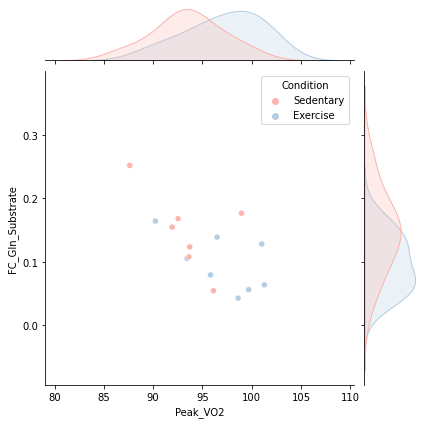

In [17]:
g = sns.jointplot(x="Peak_VO2", y="FC_Gln_Substrate", data=tumor_asp,
                  palette='Pastel1', hue_order=['Sedentary', 'Exercise'], hue='Condition')
plt.savefig('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/figures/FC_Gln_Asp_Correlation.svg', bbox_inches='tight', dpi=300)

In [19]:
stats.linregress(tumor_asp['Peak_VO2'], tumor_asp['FC_Gln_Substrate'])

LinregressResult(slope=-0.009339520234655698, intercept=1.0120595989604109, rvalue=-0.656102247684086, pvalue=0.007902177977044867, stderr=0.00297947405241248, intercept_stderr=0.28450407616406964)

In [60]:
ancova(data=tumor_asp, dv='FC_Gln_Substrate', covar='Peak_VO2', between='Condition')

,Source,SS,DF,F,p-unc,np2
0,Condition,0.001440,1,0.699376,0.419335,0.055072
1,Peak_VO2,0.011570,1,5.618918,0.035374,0.318914
2,Residual,0.024709,12,NaN,NaN,NaN


In [61]:
q = 'FC_Gln_Substrate'
a = tumor_asp[tumor_asp['Condition'] == 'Exercise'][q].tolist()
b = tumor_asp[tumor_asp['Condition'] == 'Sedentary'][q].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.813684,10.629073,two-sided,0.098024,"[-0.11, 0.01]",0.961643,1.209,0.40567


In [20]:
aspartate = fluxes[fluxes['Compound'] == 'aspartate']
quad_asp = aspartate[aspartate['Tissue'] == 'quad']
quad_asp['Peak_VO2'] = vo2
quad_asp

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_22985/4232010929.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quad_asp['Peak_VO2'] = vo2


,Unnamed: 0,Sample,Compound,APE,Plasma_Glutamine_APE,Condition,FC_Gln_Substrate,Tissue,Peak_VO2
235,15,1,aspartate,0.003866,0.103465,Exercise,0.037363,quad,90.233333
236,16,2,aspartate,0.007242,0.079388,Sedentary,0.091217,quad,93.716667
237,17,3,aspartate,0.008674,0.129421,Exercise,0.067022,quad,98.616667
238,18,4,aspartate,0.005816,0.077270,Exercise,0.075266,quad,93.450000
239,19,5,aspartate,0.010545,0.067333,Sedentary,0.156618,quad,87.633333
240,20,6,aspartate,0.012255,0.072301,Exercise,0.169505,quad,95.816667
241,21,7,aspartate,0.009505,0.109799,Sedentary,0.086568,quad,92.533333
242,22,8,aspartate,0.006156,0.068890,Exercise,0.089355,quad,101.016667
243,23,9,aspartate,0.004927,0.074863,Sedentary,0.065820,quad,96.116667
244,24,10,aspartate,0.007102,0.067964,Exercise,0.104494,quad,99.700000


In [63]:
ancova(data=quad_asp, dv='FC_Gln_Substrate', covar='Peak_VO2', between='Condition')

,Source,SS,DF,F,p-unc,np2
0,Condition,0.001341,1,0.847518,0.375392,0.065967
1,Peak_VO2,0.000080,1,0.050511,0.825958,0.004192
2,Residual,0.018992,12,NaN,NaN,NaN


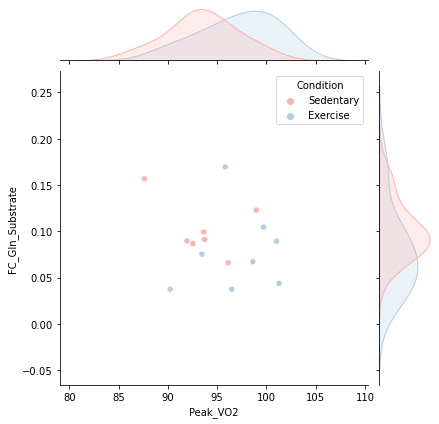

In [21]:
g = sns.jointplot(x="Peak_VO2", y="FC_Gln_Substrate", data=quad_asp,
                  palette='Pastel1', hue_order=['Sedentary', 'Exercise'], hue='Condition')
plt.savefig('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/figures/FC_Gln_Asp_Correlation_Quad.svg', bbox_inches='tight', dpi=300)

In [22]:
stats.linregress(quad_asp['Peak_VO2'], quad_asp['FC_Gln_Substrate'])

LinregressResult(slope=-0.0019227698040321095, intercept=0.2725007271858336, rvalue=-0.19891943282140012, pvalue=0.47725317028094505, stderr=0.0026273111133283404, intercept_stderr=0.2508767345994632)

In [64]:
q = 'FC_Gln_Substrate'
a = quad_asp[quad_asp['Condition'] == 'Exercise'][q].tolist()
b = quad_asp[quad_asp['Condition'] == 'Sedentary'][q].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.229737,12.225088,two-sided,0.241937,"[-0.07, 0.02]",0.619076,0.713,0.198525


Just replace asparate with the following substrates: proline, alphaketoglutarate, succinate, and malate

In [65]:
succinate = fluxes[fluxes['Compound'] == 'succinate']
quad_succinate = succinate[succinate['Tissue'] == 'quad']
quad_succinate['Peak_VO2'] = vo2
quad_succinate

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_19072/3613694238.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quad_succinate['Peak_VO2'] = vo2


,Unnamed: 0,Sample,Compound,APE,Plasma_Glutamine_APE,Condition,FC_Gln_Substrate,Tissue,Peak_VO2
280,60,1,succinate,0.007751,0.103465,Exercise,0.074914,quad,90.233333
281,61,2,succinate,0.006041,0.079388,Sedentary,0.076093,quad,93.716667
282,62,3,succinate,0.007366,0.129421,Exercise,0.056918,quad,98.616667
283,63,4,succinate,0.008192,0.077270,Exercise,0.106013,quad,93.450000
284,64,5,succinate,0.007408,0.067333,Sedentary,0.110017,quad,87.633333
285,65,6,succinate,0.006900,0.072301,Exercise,0.095439,quad,95.816667
286,66,7,succinate,0.009449,0.109799,Sedentary,0.086060,quad,92.533333
287,67,8,succinate,0.003774,0.068890,Exercise,0.054788,quad,101.016667
288,68,9,succinate,0.005048,0.074863,Sedentary,0.067430,quad,96.116667
289,69,10,succinate,0.007818,0.067964,Exercise,0.115033,quad,99.700000


In [66]:
ancova(data=quad_succinate, dv='FC_Gln_Substrate', covar='Peak_VO2', between='Condition')

,Source,SS,DF,F,p-unc,np2
0,Condition,0.001415,1,1.608478,0.228759,0.118197
1,Peak_VO2,0.000025,1,0.028211,0.869411,0.002345
2,Residual,0.010557,12,NaN,NaN,NaN


In [67]:
q = 'FC_Gln_Substrate'
a = quad_succinate[quad_succinate['Condition'] == 'Exercise'][q].tolist()
b = quad_succinate[quad_succinate['Condition'] == 'Sedentary'][q].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.584064,12.967453,two-sided,0.137254,"[-0.05, 0.01]",0.81435,0.965,0.308204


# Tissue Metabolomics

In [68]:
metabolites

,Unnamed: 0,Condition,Mouse,Compound,value,Tissue
0,0,Exercise,1,glutamate,22.615493,heart
1,1,Sedentary,2,glutamate,20.876234,heart
2,2,Exercise,3,glutamate,25.571290,heart
3,3,Exercise,5,glutamate,22.539549,heart
4,4,Sedentary,6,glutamate,23.236005,heart
...,...,...,...,...,...,...
1475,625,Sedentary,12,proline,20.724074,tumor
1476,626,Exercise,13,proline,19.714032,tumor
1477,627,Sedentary,14,proline,21.267445,tumor
1478,628,Exercise,15,proline,23.429062,tumor


In [69]:
aspartate = metabolites[metabolites['Compound'] == 'aspartate']
quad_aspartate = aspartate[aspartate['Tissue'] == 'quad']
quad_aspartate['Peak_VO2'] = vo2
quad_aspartate

/var/folders/63/kvjwtxbn1hqfmqdmm3m1gg0r0000gn/T/ipykernel_19072/3094335937.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quad_aspartate['Peak_VO2'] = vo2


,Unnamed: 0,Condition,Mouse,Compound,value,Tissue,Peak_VO2
910,255,Exercise,1,aspartate,9.756963,quad,90.233333
911,256,Sedentary,2,aspartate,12.325799,quad,93.716667
912,257,Exercise,3,aspartate,12.472886,quad,98.616667
913,258,Exercise,5,aspartate,10.384135,quad,93.450000
914,259,Sedentary,6,aspartate,11.660508,quad,87.633333
915,260,Exercise,7,aspartate,11.295310,quad,95.816667
916,261,Sedentary,8,aspartate,11.724546,quad,92.533333
917,262,Exercise,9,aspartate,12.582926,quad,101.016667
918,263,Sedentary,10,aspartate,11.698216,quad,96.116667
919,264,Exercise,11,aspartate,13.541658,quad,99.700000


In [70]:
ancova(data=quad_aspartate, dv='value', covar='Peak_VO2', between='Condition')

,Source,SS,DF,F,p-unc,np2
0,Condition,9.270278,1,13.192899,0.003437,0.523675
1,Peak_VO2,16.244113,1,23.117640,0.000428,0.658291
2,Residual,8.432061,12,NaN,NaN,NaN


In [71]:
q = 'value'
a = quad_aspartate[quad_aspartate['Condition'] == 'Exercise'][q].tolist()
b = quad_aspartate[quad_aspartate['Condition'] == 'Sedentary'][q].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.991025,12.977471,two-sided,0.339793,"[-2.22, 0.82]",0.50619,0.604,0.148311


In [76]:
q = 'Peak_RER'
a = master[master['Condition'] == 'Exercise'][q].tolist()
b = master[master['Condition'] == 'Sedentary'][q].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.932379,12.979548,two-sided,0.075434,"[-0.0, 0.05]",0.992683,1.371,0.42724
